# IMDB Linear Regression Revenue
![ImdbIcon](../images/imdbheader.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Importing so that I can use LinearRegression and OLS Models.
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import locale

In [2]:
final_df = pd.read_csv('../data/final_df.csv')

## Linear Regression

In [3]:
final_df.columns

Index(['movie_title', 'year', 'tagline', 'plot', 'cast', 'duration', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'avg_vote',
       'total_votes', 'us_voters_votes', 'votes', 'votes_1', 'votes_2',
       'votes_3', 'votes_4', 'votes_5', 'votes_6', 'votes_7', 'votes_8',
       'votes_9', 'votes_10', 'popularity', 'director_score', 'actor_score',
       'actress_score', 'tagline_sentiment', 'plot_sentiment', 'total_score',
       'profitable', 'budget', 'revenue', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [4]:
features = ['duration', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 
            'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
            'War', 'Western', 'avg_vote', 'total_votes', 'us_voters_votes', 'votes', 'votes_1', 'votes_2', 'votes_3', 
            'votes_4', 'votes_5', 'votes_6', 'votes_7', 'votes_8', 'votes_9', 'votes_10', 'popularity', 'director_score', 
            'actor_score', 'actress_score', 'tagline_sentiment', 'plot_sentiment', 'total_score', 'profitable', 
            'budget']

In [5]:
X = final_df[features]
y = final_df['revenue']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = lr.predict(X_train)

residuals = y_train - predictions

rss = (residuals ** 2).sum()

mse = metrics.mean_squared_error(y_train, predictions)

rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions))

In [9]:
print("RMSE:", rmse)
print(" ")
print("Training Score:", lr.score(X_train, y_train))
print(" ")
print("Testing Score:", lr.score(X_test, y_test))

RMSE: 102223615.75171317
 
Training Score: 0.7165782905990763
 
Testing Score: 0.5648757240804481


In [10]:
null_predictions = np.zeros_like(y_test)

null_pred = null_predictions + y_test.mean()

baseline = metrics.mean_squared_error(y_test, null_pred, squared = False)

In [11]:
print("Baseline RMSE:", baseline)
print(" ")
print("RMSE:", rmse)
print("________________________________")
print(" ")
print("Difference:", baseline - rmse)

Baseline RMSE: 155540661.6705855
 
RMSE: 102223615.75171317
________________________________
 
Difference: 53317045.91887234


## Visualizations

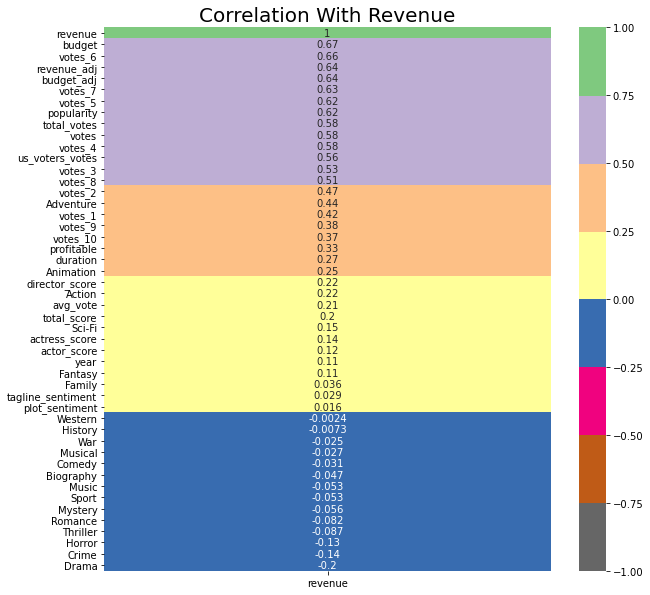

In [12]:
plt.figure(figsize = (10, 10))

movie_feature_corr = final_df.corr()[['revenue']]

sns.heatmap(movie_feature_corr.sort_values(by = 'revenue', ascending = False),
           vmin = -1, vmax = 1,
           cmap = 'Accent_r',
           annot = True);

plt.title("Correlation With Revenue", size = 20);